# Problem Statement

## World Happiness Report

### Problem Statement:

𝐂𝐨𝐧𝐭𝐞𝐱𝐭

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

𝐖𝐡𝐚𝐭 𝐢𝐬 𝐃𝐲𝐬𝐭𝐨𝐩𝐢𝐚?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

𝐖𝐡𝐚𝐭 𝐚𝐫𝐞 𝐭𝐡𝐞 𝐫𝐞𝐬𝐢𝐝𝐮𝐚𝐥𝐬?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

𝐖𝐡𝐚𝐭 𝐝𝐨 𝐭𝐡𝐞 𝐜𝐨𝐥𝐮𝐦𝐧𝐬 𝐬𝐮𝐜𝐜𝐞𝐞𝐝𝐢𝐧𝐠 𝐭𝐡𝐞 𝐇𝐚𝐩𝐩𝐢𝐧𝐞𝐬𝐬 𝐒𝐜𝐨𝐫𝐞(𝐥𝐢𝐤𝐞 𝐅𝐚𝐦𝐢𝐥𝐲, 𝐆𝐞𝐧𝐞𝐫𝐨𝐬𝐢𝐭𝐲, 𝐞𝐭𝐜.) 𝐝𝐞𝐬𝐜𝐫𝐢𝐛𝐞?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the 𝐡𝐚𝐩𝐩𝐢𝐧𝐞𝐬𝐬 𝐬𝐜𝐨𝐫𝐞 considering all the other factors mentioned in the dataset. 

In [474]:
#importing all the necessary libraries and modules

import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')

In [361]:
df = pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## Exploratory Data Analysis

In [362]:
df.isnull().sum() #checking for null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [363]:
df.dtypes #looking at the datatypes of the columns

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [364]:
#before encoding 

df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [365]:
#before encoding

df.corr()['Happiness Score']

Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

In [366]:
#changing the datatype of happiness rank to float to match the rest

df['Happiness Rank'] = df['Happiness Rank'].astype(float)
df.dtypes

Country                           object
Region                            object
Happiness Rank                   float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [367]:
#making a nominal dataframe

df_nominal = df[['Country','Region']].copy()
df_nominal.head()

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [368]:
#making a dataframe of the rest of the columns

df_new = df.drop(columns=['Country','Region','Standard Error'])
df_new.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

## Data Visualization

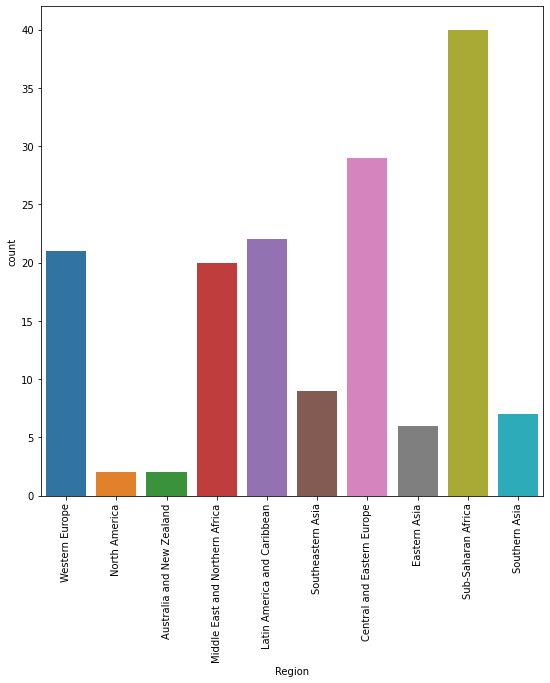

In [369]:
plt.figure(figsize=(9,9))
ax = sns.countplot(x='Region',data=df_nominal).tick_params(axis='x', rotation=90)

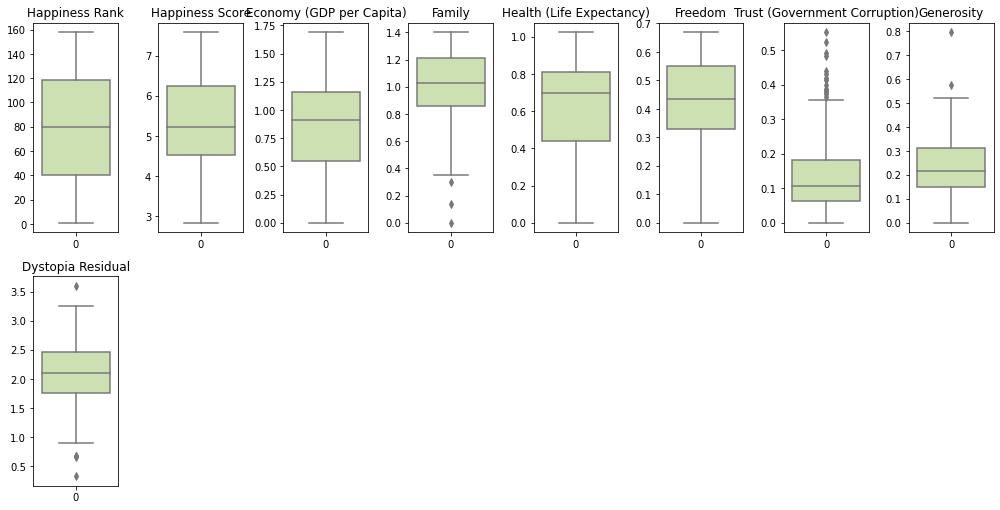

In [370]:
#finding outliers

collist=df_new.columns.values
ncol=8
nrow=4

plt.figure(figsize=(14,14))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df_new[collist[i]],color='#CFE8A9',orient='v')
    plt.title(df_new.columns[i])
    plt.tight_layout()

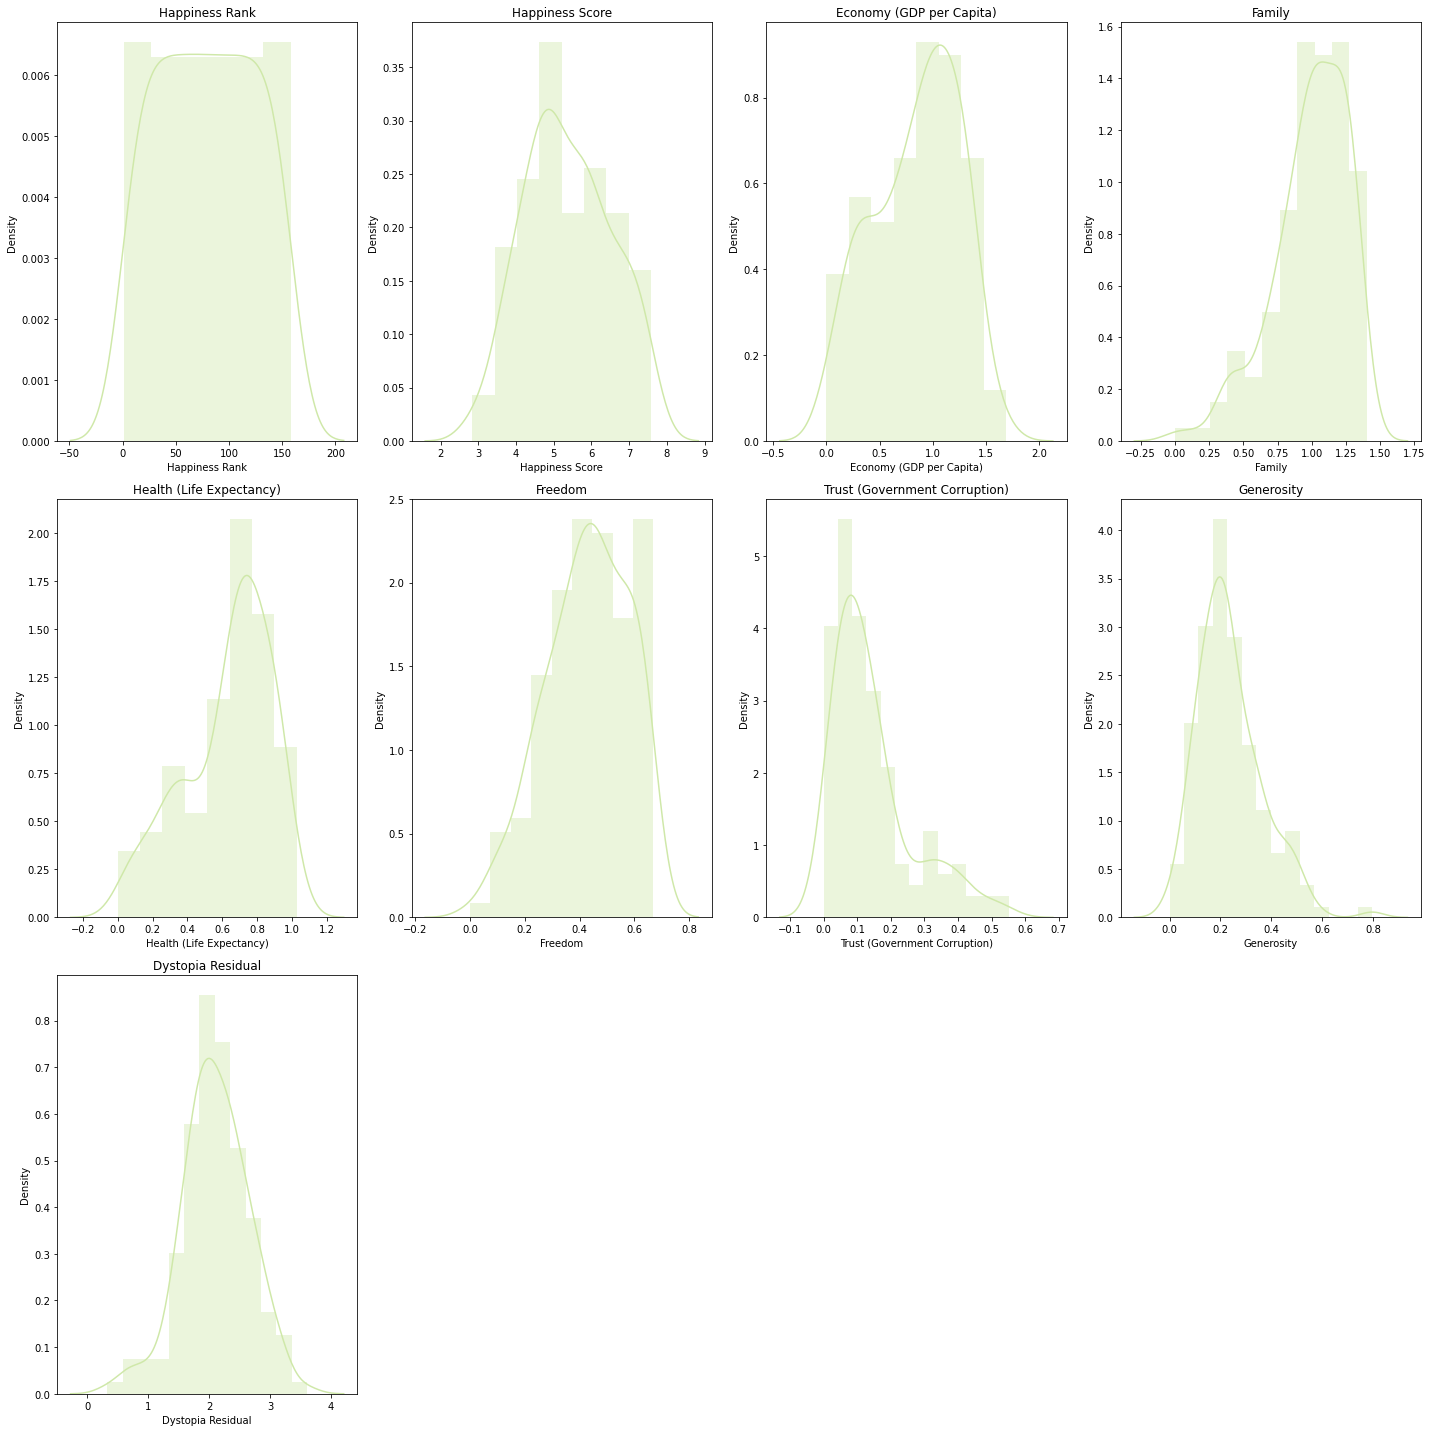

In [371]:
# checking standard deviation

collist=df_new.columns.values
ncol=4
nrow=3

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df_new[collist[i]],color='#CFE8A9',kde=True)
    plt.title(df_new.columns[i])
    plt.tight_layout()

## Encoding the data

In [372]:
from sklearn.preprocessing import OrdinalEncoder
en = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = en.fit_transform(df[i].values.reshape(-1,1))
        
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## Describe and Heatmap

In [373]:
#analyzing the skewness, outliers and the correlation post-encoding

df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

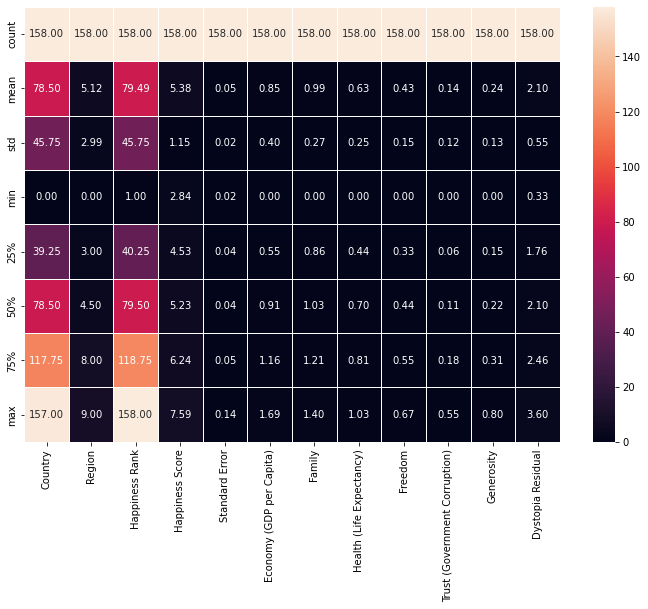

In [374]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(), annot= True, linecolor='w', linewidth=0.5, fmt=".2f")

## Correlation and Heatmap

In [375]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


In [376]:
df.corr()['Happiness Score']

Country                          0.083380
Region                          -0.176791
Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

<AxesSubplot:>

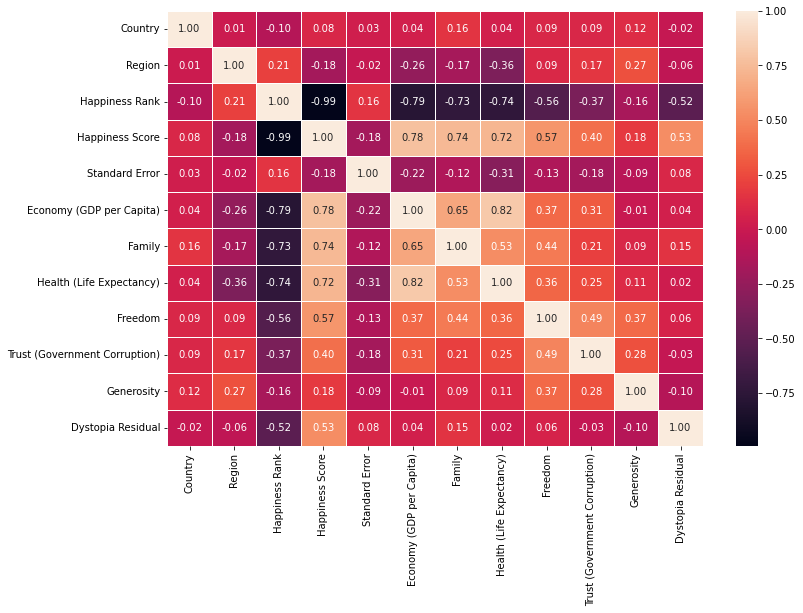

In [377]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, linecolor='w', linewidth=0.5,fmt='0.2f')

In [378]:
#prints the correlation percentages, minimum correlation and maximum correlation in an understandable manner

correlation_list=[]
correlation_dictionary = {}

for i in range(0,12):
    if df.columns[i]!='Happiness Score':
        print ('The correlation percentage of',df.columns[i],'is',round(df.corr()['Happiness Score'][i]*100),'%')
        corr_dict={df.columns[i]:round(df.corr()['Happiness Score'][i]*100)}
        correlation_dictionary.update(corr_dict)

print ('\nMaximum Correlation:',max(correlation_dictionary,key=correlation_dictionary.get))
print ('\nMinimum Correlation:',min(correlation_dictionary,key=correlation_dictionary.get))

The correlation percentage of Country is 8 %
The correlation percentage of Region is -18 %
The correlation percentage of Happiness Rank is -99 %
The correlation percentage of Standard Error is -18 %
The correlation percentage of Economy (GDP per Capita) is 78 %
The correlation percentage of Family is 74 %
The correlation percentage of Health (Life Expectancy) is 72 %
The correlation percentage of Freedom is 57 %
The correlation percentage of Trust (Government Corruption) is 40 %
The correlation percentage of Generosity is 18 %
The correlation percentage of Dystopia Residual is 53 %

Maximum Correlation: Economy (GDP per Capita)

Minimum Correlation: Happiness Rank


## Skewness

In [379]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [380]:
df.drop(['Standard Error','Trust (Government Corruption)','Generosity'], axis=1, inplace=True)

## Multicollinearity

In [381]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variables'] = df.columns
vif['VIF Factor'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif

,Variables,VIF Factor
0,Country,4.129215
1,Region,5.500829
2,Happiness Rank,3.805536
3,Happiness Score,1288.437723
4,Economy (GDP per Capita),54.184034
5,Family,68.870526
6,Health (Life Expectancy),52.635506
7,Freedom,35.626597
8,Dystopia Residual,201.214873


## Removing outliers using Zscore

In [382]:
z = np.abs(zscore(df))
z

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,1.369621,1.320281,1.263408,1.577438,0.758258
1,0.449465,1.300256,1.699075,1.914581,1.135226,1.514458,1.289434,1.332456,1.092857
2,0.909893,1.300256,1.677149,1.884792,1.192861,1.361054,0.992229,1.469659,0.712335
3,0.581016,1.300256,1.655224,1.880411,1.525130,1.251922,1.035145,1.605131,0.663893
4,1.194920,0.040302,1.633299,1.797179,1.194876,1.221204,1.118054,1.360416,0.639337
...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,1.674055,1.552987,0.800520,0.818610,1.087740,2.588925
154,1.436096,0.965117,1.655501,1.783571,1.392303,2.346860,1.263362,0.372033,0.843967
155,1.260695,0.375441,1.677427,2.076199,0.455245,1.901086,0.372199,1.809238,3.208430
156,1.260695,0.965117,1.699352,2.164688,2.067566,2.118467,1.649648,2.064472,0.481985


In [383]:
np.where(z>2.5)

(array([ 13,  71, 111, 122, 131, 147, 152, 153, 155, 157], dtype=int64),
 array([8, 8, 7, 6, 8, 5, 5, 8, 8, 5], dtype=int64))

In [384]:
df_new = df[(z<2.5).all(axis=1)]
df_new

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
0,135.0,9.0,1.0,7.587,1.39651,1.34951,0.94143,0.66557,2.51738
1,58.0,9.0,2.0,7.561,1.30232,1.40223,0.94784,0.62877,2.70201
2,37.0,9.0,3.0,7.527,1.32548,1.36058,0.87464,0.64938,2.49204
3,105.0,9.0,4.0,7.522,1.45900,1.33095,0.88521,0.66973,2.46531
4,24.0,5.0,5.0,7.427,1.32629,1.32261,0.90563,0.63297,2.45176
...,...,...,...,...,...,...,...,...,...
149,53.0,8.0,150.0,3.656,0.17417,0.46475,0.24009,0.37725,1.99172
150,66.0,8.0,151.0,3.655,0.46534,0.77115,0.15185,0.46866,1.41723
151,20.0,8.0,152.0,3.587,0.25812,0.85188,0.27125,0.39493,1.46494
154,13.0,8.0,155.0,3.340,0.28665,0.35386,0.31910,0.48450,1.63328


In [385]:
print ("Size of old dataset = ",df.shape[0])
print ("Size of new dataset = ",df_new.shape[0])
print ("The amount of data dropped = ",df.shape[0]-df_new.shape[0])
print ("Loss percentage =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100,'%')

Size of old dataset =  158
Size of new dataset =  148
The amount of data dropped =  10
Loss percentage = 6.329113924050633 %


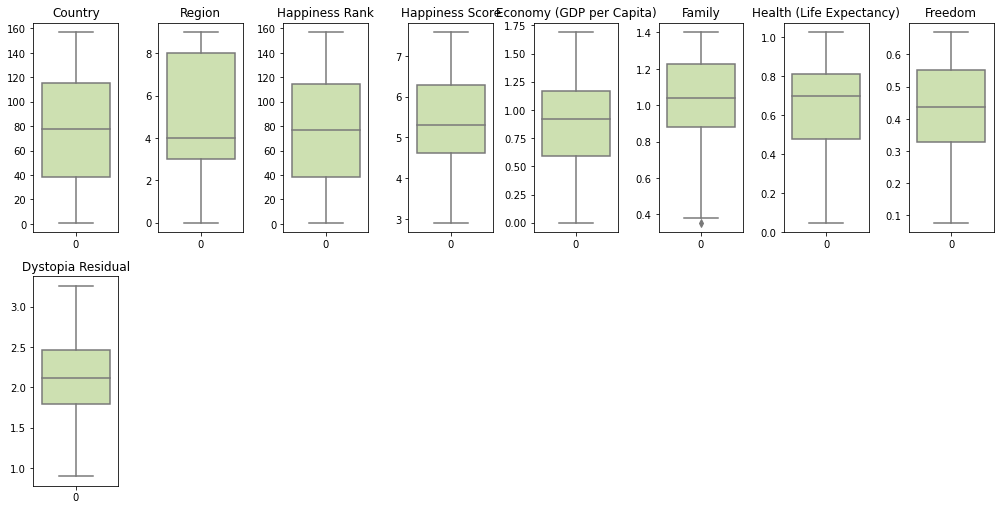

In [386]:
#checking presence of outliers

collist=df_new.columns.values
ncol=8
nrow=4

plt.figure(figsize=(14,14))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df_new[collist[i]],color='#CFE8A9',orient='v')
    plt.title(df_new.columns[i])
    plt.tight_layout()

## Seperating data into X & Y

In [387]:
#independent variables
x = df_new.drop(['Happiness Score'],axis=1)

#target variable
y = df_new['Happiness Score']

In [388]:
#checking the mean and the STD before applying StandardScaler

array_x = np.array(x)
print ("Mean before StandardScalar =",array_x.mean())
print ("Standard deviation before StandardScalar =",array_x.std())

Mean before StandardScalar = 20.575399400337837
Standard deviation before StandardScalar = 39.69541241985687


## Removing skewness using power transform

In [389]:
#skewness of x before power transform
u=df_new.drop(['Happiness Score'],axis=1)
u.skew()

Country                     0.038624
Region                     -0.083207
Happiness Rank              0.037340
Economy (GDP per Capita)   -0.361425
Family                     -0.778408
Health (Life Expectancy)   -0.722940
Freedom                    -0.325926
Dystopia Residual           0.082082
dtype: float64

In [397]:
from sklearn.preprocessing import power_transform

x = power_transform(x, method='yeo-johnson')
x

array([[ 1.24064264,  1.30345021, -1.88760562, ...,  1.5963026 ,
         1.76165324,  0.80038068],
       [-0.4028167 ,  1.30345021, -1.84122693, ...,  1.64627674,
         1.44152581,  1.16213419],
       [-0.86234297,  1.30345021, -1.79910823, ...,  1.10519395,
         1.61944092,  0.75034839],
       ...,
       [-1.26936342,  0.96892189,  1.66961343, ..., -1.40850158,
        -0.3317829 , -1.37213536],
       [-1.45797899,  0.96892189,  1.73448946, ..., -1.296686  ,
         0.2938988 , -1.0103345 ],
       [-1.24379034,  0.96892189,  1.77769638, ..., -1.50932053,
        -1.89553726, -0.58854718]])

In [398]:
#cheking skewness after applying power transform
temp_x = pd.DataFrame(x,columns=['Country','Region','Happiness Rank','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Dystopia Residual'])
temp_x.skew()

Country                    -0.045097
Region                     -0.091519
Happiness Rank             -0.045007
Economy (GDP per Capita)    0.010595
Family                     -0.032023
Health (Life Expectancy)   -0.003643
Freedom                    -0.025817
Dystopia Residual          -0.026283
dtype: float64

In [495]:
#difference of skewness 
skewness_diff = pd.DataFrame({'Before Transform':u.skew(),'After Transform':temp_x.skew()})
skewness_diff

,Before Transform,After Transform
Country,0.038624,-0.045097
Region,-0.083207,-0.091519
Happiness Rank,0.037340,-0.045007
Economy (GDP per Capita),-0.361425,0.010595
Family,-0.778408,-0.032023
Health (Life Expectancy),-0.722940,-0.003643
Freedom,-0.325926,-0.025817
Dystopia Residual,0.082082,-0.026283


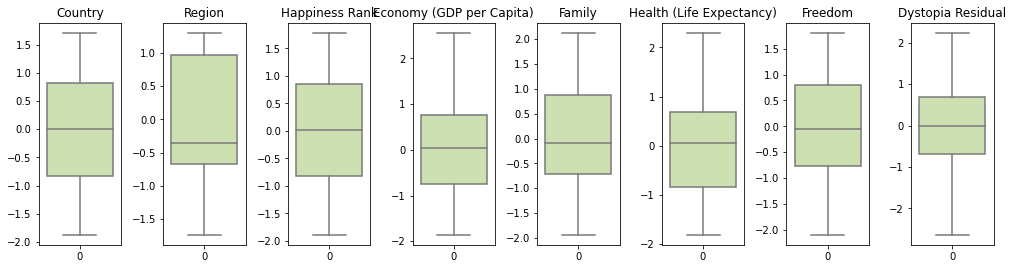

In [400]:
#checking presence of outliers

collist=temp_x.columns.values
ncol=8
nrow=4

plt.figure(figsize=(14,14))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=temp_x[collist[i]],color='#CFE8A9',orient='v')
    plt.title(temp_x.columns[i])
    plt.tight_layout()

In [401]:
#using StandardScaler()

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[ 1.24064264,  1.30345021, -1.88760562, ...,  1.5963026 ,
         1.76165324,  0.80038068],
       [-0.4028167 ,  1.30345021, -1.84122693, ...,  1.64627674,
         1.44152581,  1.16213419],
       [-0.86234297,  1.30345021, -1.79910823, ...,  1.10519395,
         1.61944092,  0.75034839],
       ...,
       [-1.26936342,  0.96892189,  1.66961343, ..., -1.40850158,
        -0.3317829 , -1.37213536],
       [-1.45797899,  0.96892189,  1.73448946, ..., -1.296686  ,
         0.2938988 , -1.0103345 ],
       [-1.24379034,  0.96892189,  1.77769638, ..., -1.50932053,
        -1.89553726, -0.58854718]])

In [402]:
print ("Mean after StandardScalar =",x.mean())
print ("Standard deviation after StandardScalar =",x.std())

Mean after StandardScalar = -1.650331523091449e-17
Standard deviation after StandardScalar = 1.0


In [410]:
#difference of mean and std after applying StandardScaler()

diff_x = pd.DataFrame({'':['Mean','STD'],'Before SS':[array_x.mean(),array_x.std()],'After SS':[x.mean(),x.std()]})
diff_x

,,Before SS,After SS
0,Mean,20.575399,-1.650332e-17
1,STD,39.695412,1.000000e+00


## Model Building

#### SVR

In [473]:
svr=SVR()
svr_para = {'kernel':['linear','poly','rbf','sigmoid'],'C':[1,10]}
gsCV_svr = GridSearchCV(svr,svr_para)
gsCV_svr.fit(x_train,y_train)
gsCV_svr.best_params_

{'C': 10, 'kernel': 'linear'}

In [516]:
svr = SVR(kernel='linear',C=10)
svr.fit(x_train,y_train)
svr_y_pred = svr.predict(x_test)
svr_test_score = svr.score(x_test,y_test)
svr_train_score = svr.score(x_train,y_train)
svr_r2 = r2_score(y_test,svr_y_pred)
svr_mae = mean_absolute_error(y_test,svr_y_pred)
svr_mse = mean_squared_error(y_test,svr_y_pred)
svr_rmse = mean_squared_error(y_test,svr_y_pred,squared=False)
print ("Test Score:",round(svr_test_score*100,2),'%')
print ("Train Score:",round(svr_train_score*100,2),'%')
print ("r2 Score:",round(svr_r2*100,2),'%')
print ("Mean Absolute Error:",svr_mae)
print ("Mean Squared Error:",svr_mse)
print ("Root Mean Squared Error:",svr_rmse)

Test Score: 99.18 %
Train Score: 99.25 %
r2 Score: 99.18 %
Mean Absolute Error: 0.08092875211412759
Mean Squared Error: 0.010570038073038095
Root Mean Squared Error: 0.10281069046085672


#### DecisionTreeRegressor

In [480]:
dtr = DecisionTreeRegressor()
dtr_para = {'criterion':["squared_error","friedman_mse","absolute_error","poisson"],'random_state':[1,70]}
gsCV_dtr = GridSearchCV(dtr,dtr_para)
gsCV_dtr.fit(x_train,y_train)
gsCV_dtr.best_params_

{'criterion': 'friedman_mse', 'random_state': 1}

In [515]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',random_state=1)
dtr.fit(x_train,y_train)
dtr_y_pred = dtr.predict(x_test)
dtr_test_score = dtr.score(x_test,y_test)
dtr_train_score = dtr.score(x_train,y_train)
dtr_r2 = r2_score(y_test,dtr_y_pred)
dtr_mae = mean_absolute_error(y_test,dtr_y_pred)
dtr_mse = mean_squared_error(y_test,dtr_y_pred)
dtr_rmse = mean_squared_error(y_test,dtr_y_pred,squared=False)
print ("Test Score:",round(dtr_test_score*100,2),'%')
print ("Train Score:",round(dtr_train_score*100,2),'%')
print ("r2 Score:",round(dtr_r2*100,2),'%')
print ("Mean Absolute Error:",dtr_mae)
print ("Mean Squared Error:",dtr_mse)
print ("Root Mean Squared Error:",dtr_rmse)

Test Score: 96.12 %
Train Score: 100.0 %
r2 Score: 96.12 %
Mean Absolute Error: 0.09853333333333329
Mean Squared Error: 0.049744066666666704
Root Mean Squared Error: 0.22303377920545286


#### Ridge

In [514]:
r = Ridge()
r.fit(x_train,y_train)
r_y_pred = r.predict(x_test)
r_test_score = r.score(x_test,y_test)
r_train_score = r.score(x_train,y_train)
r_r2 = r2_score(y_test,r_y_pred)
r_mae = mean_absolute_error(y_test,r_y_pred)
r_mse = mean_squared_error(y_test,r_y_pred)
r_rmse = mean_squared_error(y_test,r_y_pred,squared=False)
print ("Test Score:",round(r_test_score*100,2),'%')
print ("Train Score:",round(r_train_score*100,2),'%')
print ("r2 Score:",round(r_r2*100,2),'%')
print ("Mean Absolute Error:",r_mae)
print ("Mean Squared Error:",r_mse)
print ("Root Mean Squared Error:",r_rmse)

Test Score: 99.12 %
Train Score: 99.26 %
r2 Score: 99.12 %
Mean Absolute Error: 0.08289309675106098
Mean Squared Error: 0.01129253536690675
Root Mean Squared Error: 0.1062663416463875


#### Lasso

In [513]:
l = Lasso()
l.fit(x_train,y_train)
l_y_pred = l.predict(x_test)
l_test_score = l.score(x_test,y_test)
l_train_score = l.score(x_train,y_train)
l_r2 = r2_score(y_test,l_y_pred)
l_mae = mean_absolute_error(y_test,l_y_pred)
l_mse = mean_squared_error(y_test,l_y_pred)
l_rmse = mean_squared_error(y_test,l_y_pred,squared=False)
print ("Test Score:",round(l_test_score*100,2),'%')
print ("Train Score:",round(l_train_score*100,2),'%')
print ("r2 Score:",round(l_r2*100,2),'%')
print ("Mean Absolute Error:",l_mae)
print ("Mean Squared Error:",l_mse)
print ("Root Mean Squared Error:",l_rmse)

Test Score: 10.81 %
Train Score: 12.41 %
r2 Score: 10.81 %
Mean Absolute Error: 0.8928640694126037
Mean Squared Error: 1.1441619740132303
Root Mean Squared Error: 1.0696550724477636


#### LinearRegression

In [512]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)
lreg_y_pred = lreg.predict(x_test)
lreg_test_score = lreg.score(x_test,y_test)
lreg_train_score = lreg.score(x_train,y_train)
lreg_r2 = r2_score(y_test,lreg_y_pred)
lreg_mae = mean_absolute_error(y_test,lreg_y_pred)
lreg_mse = mean_squared_error(y_test,lreg_y_pred)
lreg_rmse = mean_squared_error(y_test,lreg_y_pred,squared=False)
print ("Test Score:",round(lreg_test_score*100,2),'%')
print ("Train Score:",round(lreg_train_score*100,2),'%')
print ("r2 Score:",round(lreg_r2*100,2),'%')
print ("Mean Absolute Error:",lreg_mae)
print ("Mean Squared Error:",lreg_mse)
print ("Root Mean Squared Error:",lreg_rmse)

Test Score: 99.23 %
Train Score: 99.3 %
r2 Score: 99.23 %
Mean Absolute Error: 0.07805522517249498
Mean Squared Error: 0.009884793046892977
Root Mean Squared Error: 0.09942229652795682


#### RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()
rfr_para = {'n_estimators':range(0,100),'criterion':['squared_error','absolute_error','poisson'],'random_state':range(0,70)}
gsCV_rfr = GridSearchCV(rfr,rfr_para)
gsCV_rfr.fit(x_train,y_train)
gsCV_rfr.best_params_

In [511]:
rfr = RandomForestRegressor(n_estimators=200,criterion='poisson',random_state=70)
rfr.fit(x_train,y_train)
rfr_y_pred = rfr.predict(x_test)
rfr_test_score = rfr.score(x_test,y_test)
rfr_train_score = rfr.score(x_train,y_train)
rfr_r2 = r2_score(y_test,rfr_y_pred)
rfr_mae = mean_absolute_error(y_test,rfr_y_pred)
rfr_mse = mean_squared_error(y_test,rfr_y_pred)
rfr_rmse = mean_squared_error(y_test,rfr_y_pred,squared=False)
print ("Test Score:",round(rfr_test_score*100,2),'%')
print ("Train Score:",round(rfr_train_score*100,2),'%')
print ("r2 Score:",round(rfr_r2*100,2),'%')
print ("Mean Absolute Error:",rfr_mae)
print ("Mean Squared Error:",rfr_mse)
print ("Root Mean Squared Error:",rfr_rmse)

Test Score: 71.26 %
Train Score: 99.34 %
r2 Score: 71.26 %
Mean Absolute Error: 0.24693049999999916
Mean Squared Error: 0.3686735468775009
Root Mean Squared Error: 0.6071849363064773


#### XGBRegressor

In [560]:
xgb = XGBRegressor()
xgb_para = {'n_estimators':range(0,100)}
gsCV_xgb = GridSearchCV(xgb,xgb_para)
gsCV_xgb.fit(x_train,y_train)
gsCV_xgb.best_params_

{'n_estimators': 61}

In [562]:
xgb = XGBRegressor(n_estimators=300)
xgb.fit(x_train,y_train)
xgb_y_pred = xgb.predict(x_test)
xgb_test_score = xgb.score(x_test,y_test)
xgb_train_score = xgb.score(x_train,y_train)
xgb_r2 = r2_score(y_test,xgb_y_pred)
xgb_mae = mean_absolute_error(y_test,xgb_y_pred)
xgb_mse = mean_squared_error(y_test,xgb_y_pred)
xgb_rmse = mean_squared_error(y_test,xgb_y_pred,squared=False)
print ("Test Score:",round(xgb_test_score*100,2),'%')
print ("Train Score:",round(xgb_train_score*100,2),'%')
print ("r2 Score:",round(xgb_r2*100,2),'%')
print ("Mean Absolute Error:",xgb_mae)
print ("Mean Squared Error:",xgb_mse)
print ("Root Mean Squared Error:",xgb_rmse)

Test Score: 98.78 %
Train Score: 100.0 %
r2 Score: 98.78 %
Mean Absolute Error: 0.07871105696360273
Mean Squared Error: 0.015232060673291938
Root Mean Squared Error: 0.12341823476817329


#### GradientBoostingRegressor

In [556]:
gbr = GradientBoostingRegressor()
gbr_para = {'n_estimators':range(0,70)}
gsCV_gbr = GridSearchCV(gbr,gbr_para)
gsCV_gbr.fit(x_train,y_train)
gsCV_gbr.best_params_

{'n_estimators': 64}

In [557]:
gbr = GradientBoostingRegressor(n_estimators=64)
gbr.fit(x_train,y_train)
gbr_y_pred = gbr.predict(x_test)
gbr_test_score = gbr.score(x_test,y_test)
gbr_train_score = gbr.score(x_train,y_train)
gbr_r2 = r2_score(y_test,gbr_y_pred)
gbr_mae = mean_absolute_error(y_test,gbr_y_pred)
gbr_mse = mean_squared_error(y_test,gbr_y_pred)
gbr_rmse = mean_squared_error(y_test,gbr_y_pred,squared=False)
print ("Test Score:",round(gbr_test_score*100,2),'%')
print ("Train Score:",round(gbr_train_score*100,2),'%')
print ("r2 Score:",round(gbr_r2*100,2),'%')
print ("Mean Absolute Error:",gbr_mae)
print ("Mean Squared Error:",gbr_mse)
print ("Root Mean Squared Error:",gbr_rmse)

Test Score: 99.33 %
Train Score: 100.0 %
r2 Score: 99.33 %
Mean Absolute Error: 0.041757309073685106
Mean Squared Error: 0.008301091200419228
Root Mean Squared Error: 0.09111032433494697


#### KNeighborsRegressor

In [552]:
knr = KNeighborsRegressor()
knr_para = {'n_neighbors':range(0,10)}
gsCV_knr = GridSearchCV(knr,knr_para)
gsCV_knr.fit(x_train,y_train)
gsCV_knr.best_params_

{'n_neighbors': 5}

In [553]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
knr_y_pred = knr.predict(x_test)
knr_test_score = knr.score(x_test,y_test)
knr_train_score = knr.score(x_train,y_train)
knr_r2 = r2_score(y_test,knr_y_pred)
knr_mae = mean_absolute_error(y_test,knr_y_pred)
knr_mse = mean_squared_error(y_test,knr_y_pred)
knr_rmse = mean_squared_error(y_test,knr_y_pred,squared=False)
print ("Test Score:",round(knr_test_score*100,2),'%')
print ("Train Score:",round(knr_train_score*100,2),'%')
print ("r2 Score:",round(knr_r2*100,2),'%')
print ("Mean Absolute Error:",knr_mae)
print ("Mean Squared Error:",knr_mse)
print ("Root Mean Squared Error:",knr_rmse)

Test Score: 89.93 %
Train Score: 95.64 %
r2 Score: 89.93 %
Mean Absolute Error: 0.24901999999999994
Mean Squared Error: 0.12549227866666662
Root Mean Squared Error: 0.35424889367034956


### Comparing models

In [570]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

CV_score = []
accuracy = []
rmse_list = []
mse_list = []
mae_list = [] 
model_name = []
r2_list = []

models={"SupportVectorRegression":svr,"DecisionTreeRegressor":dtr,
        "Ridge":r,"LinearRegression":lreg,"Lasso":l,
        "RandomForestRegressor":rfr, "XGBRegressor":xgb,
        "GradientBoostingRegressor":gbr,"KNeighborsRegressor":knr}

for i in models.keys():
    model = models[i]
    model.fit(x_train,y_train)
    test_score = model.score(x_test,y_test)
    train_score = model.score(x_train,y_train)
    y_pred=model.predict(x_test)
    cv_score=cross_val_score(models[i],x,y).mean()
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    r2 = r2_score(y_test,y_pred)
    print("-"*30)
    print("Model:", i)
    model_name.append(i)
    print("Train Score %:", round(train_score*100,3))
    print("Test Score %:", round(test_score*100,3))
    accuracy.append(round(test_score*100,3))
    print("R2 Score:",round(r2*100,3))
    r2_list.append(round(r2*100,3))
    print("CV Score:",round(cv_score*100,2))
    CV_score.append(round(cv_score*100,2))
    print("MSE :",mse)
    mse_list.append(mse)
    print("RMSE:",rmse)
    rmse_list.append(rmse)
    print("MAE :",mae)
    mae_list.append(mae)

------------------------------
Model: SupportVectorRegression
Train Score %: 99.23
Test Score %: 99.4
R2 Score: 99.4
CV Score: 72.98
MSE : 0.0058806626775829976
RMSE: 0.07668547892256393
MAE : 0.061503472513173826
------------------------------
Model: DecisionTreeRegressor
Train Score %: 100.0
Test Score %: 99.645
R2 Score: 99.645
CV Score: -141.68
MSE : 0.0034777666666666604
RMSE: 0.05897259250420199
MAE : 0.0442999999999999
------------------------------
Model: Ridge
Train Score %: 99.217
Test Score %: 99.475
R2 Score: 99.475
CV Score: 75.47
MSE : 0.005149490810452281
RMSE: 0.07175995269265638
MAE : 0.05830127266002273
------------------------------
Model: LinearRegression
Train Score %: 99.265
Test Score %: 99.439
R2 Score: 99.439
CV Score: 75.12
MSE : 0.005498747598338028
RMSE: 0.0741535406999425
MAE : 0.05888156980157181
------------------------------
Model: Lasso
Train Score %: 21.65
Test Score %: 21.553
R2 Score: 21.553
CV Score: -1878.59
MSE : 0.7690216092225693
RMSE: 0.8769387

In [571]:
model_df = pd.DataFrame({'Model':model_name,'Accuracy':accuracy,'CV Score':CV_score,'R2 Score':r2_list,'MSE':mse_list,
                        'RMSE':rmse_list,'MAE':mae_list})
model_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,CV Score,R2 Score,MSE,RMSE,MAE
5,RandomForestRegressor,99.839,-146.32,99.839,0.001580,0.039753,0.031007
7,GradientBoostingRegressor,99.760,-113.66,99.760,0.002349,0.048467,0.035973
1,DecisionTreeRegressor,99.645,-141.68,99.645,0.003478,0.058973,0.044300
2,Ridge,99.475,75.47,99.475,0.005149,0.071760,0.058301
3,LinearRegression,99.439,75.12,99.439,0.005499,0.074154,0.058882
0,SupportVectorRegression,99.400,72.98,99.400,0.005881,0.076685,0.061503
6,XGBRegressor,98.844,-124.11,98.844,0.011335,0.106466,0.081172
8,KNeighborsRegressor,94.427,-348.59,94.427,0.054631,0.233733,0.186667
4,Lasso,21.553,-1878.59,21.553,0.769022,0.876939,0.720816


## Saving file

In [573]:
file = "World_Happiness_DataTrained"
pickle.dump(model_df,open(file,'wb'))